# Supervised learning leveraging cluster outcomes

## Load the data and import pipeline package 

In [1]:
import pipeline #a package we have previously written + will use some functions from
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from os import path
from IPython.display import Image
import pipeline
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import sk_models # a script we wrote to run classifiers below

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
#This comes from the output of our clustering analysis
df = pd.read_csv('clustered_data.csv')

In [3]:
df.head(1)

,year,SEQN,BMXBMI,BPQ020,RIDAGEYR,RIAGENDR,INDFMPIR,RIDRETH1,TKCAL,TPROT,TCARB,TSUGR,TTFAT,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,assignment_kmeans
0,2007-2008,41475,58.04,1,62,2,1.83,5,3057,139.31,348.69,160.48,125.33,-1.617823,1.919746,0.455475,-0.172202,0.297086,2.514255,-0.836439,-1.447478,1.210543,0.014087,3.585609,-1.442924,1.06467,-0.591428,1.113903,1.035296,-0.094012,0.249038,0.889505,-1.001357,1


In [4]:
#Initial exploration
#for col in df.columns:
 #   print(col,": ", type(col))

In [5]:
#Split the data using sklearn's default 80/20
(train, test) = sklearn.model_selection.train_test_split(df)

In [6]:
#Clean the datasets - updated package + included parameters for this dataset
clean_train, clean_test = pipeline.clean_split((train, test))

In [7]:
clean_train.head(1)

,cluster_1,has_had_hbp,is_obese,RIDAGEYR_scaled,INDFMPIR_scaled,RIAGENDR_1,RIAGENDR_2,RIDRETH1_1,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5
8583,1,0,0,-0.224054,0.338008,0,1,0,0,1,0,0


In [8]:
#Checking columns
clean_train.columns

Index(['cluster_1', 'has_had_hbp', 'is_obese', 'RIDAGEYR_scaled',
       'INDFMPIR_scaled', 'RIAGENDR_1', 'RIAGENDR_2', 'RIDRETH1_1',
       'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5'],
      dtype='object')

In [9]:
#First let's grab BMI (obesity) as the output label - drop the vars and make obese the label

clean_train['label'] = clean_train['is_obese']
clean_train_o = clean_train.drop(['has_had_hbp','is_obese'], axis=1)

clean_test['label'] = clean_test['is_obese']
clean_test_o = clean_test.drop(['has_had_hbp','is_obese'], axis=1)


In [10]:
#Now let's grab blood pressure - drop the vars and make high blood pressure the label

clean_train['label'] = clean_train['has_had_hbp']
clean_train_b = clean_train.drop(['has_had_hbp','is_obese'], axis=1)

clean_test['label'] = clean_test['has_had_hbp']
clean_test_b = clean_test.drop(['has_had_hbp','is_obese'], axis=1)

In [11]:
#col_check
clean_test_b.columns

Index(['cluster_1', 'RIDAGEYR_scaled', 'INDFMPIR_scaled', 'RIAGENDR_1',
       'RIAGENDR_2', 'RIDRETH1_1', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4',
       'RIDRETH1_5', 'label'],
      dtype='object')

In [12]:
#Now let's make dfs leveraging components instead of cluster assignments

clean_train_pca, clean_test_pca = pipeline.clean_split((train, test), components=True)

clean_train_pca['label'] = clean_train_pca['is_obese']
clean_train_o_pca = clean_train_pca.drop(['has_had_hbp','is_obese'], axis=1)

clean_test_pca['label'] = clean_test_pca['is_obese']
clean_test_o_pca = clean_test_pca.drop(['has_had_hbp','is_obese'], axis=1)

In [13]:
#Now let's make dfs leveraging components instead of cluster assignments

clean_train_pca, clean_test_pca = pipeline.clean_split((train, test), components=True)

clean_train_pca['label'] = clean_train_pca['has_had_hbp']
clean_train_b_pca = clean_train_pca.drop(['has_had_hbp','is_obese'], axis=1)

clean_test_pca['label'] = clean_test_pca['has_had_hbp']
clean_test_b_pca = clean_test_pca.drop(['has_had_hbp','is_obese'], axis=1)

In [14]:
#col_check
clean_test_o_pca.columns

Index(['cluster_1', 'RIDAGEYR_scaled', 'INDFMPIR_scaled', 'PC1_scaled',
       'PC2_scaled', 'PC3_scaled', 'PC4_scaled', 'PC5_scaled', 'PC6_scaled',
       'PC7_scaled', 'PC8_scaled', 'PC9_scaled', 'PC10_scaled', 'PC11_scaled',
       'PC12_scaled', 'PC13_scaled', 'PC14_scaled', 'PC15_scaled',
       'PC16_scaled', 'PC17_scaled', 'PC18_scaled', 'PC19_scaled',
       'PC20_scaled', 'RIAGENDR_1', 'RIAGENDR_2', 'RIDRETH1_1', 'RIDRETH1_2',
       'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'label'],
      dtype='object')

## Run models for predicting obesity 

In [15]:
#Obesity - using cluster, rf
sk_models.run_rf_model(clean_train_o, clean_test_o, ['label'], list(clean_train_o.drop(['label'],axis=1).columns),
          .8)

(array([0.48111111, 0.4       , 0.1       , ..., 0.        , 0.3       ,
        0.4       ]), array([0, 0, 0, ..., 0, 0, 0]), 0.6329915560916767)

In [16]:
#Obesity - using cluster, SVC
sk_models.run_SVC_model(clean_train_o, clean_test_o, ['label'], list(clean_train_o.drop(['label'],axis=1).columns),
          .8)

(array([0.34842585, 0.48390787, 0.34838591, ..., 0.34839155, 0.34854698,
        0.34835592]), array([0, 0, 0, ..., 0, 0, 0]), 0.6387213510253317)

In [17]:
#Obesity - using cluster, stump decision tree
o_tree, o_accuracy_t = sk_models.run_DT_model(clean_train_o, clean_test_o, ['label'], list(clean_train_o.drop(['label'],axis=1).columns),
          .8)

o_accuracy_t

0.6387213510253317

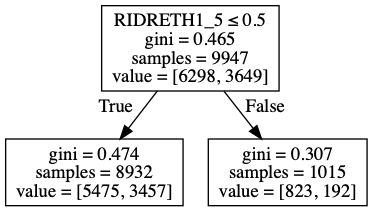

In [18]:
#Print tree
col_names = list(clean_train_o.drop(columns=['label']).columns)
dot_data = StringIO()
export_graphviz(o_tree, out_file=dot_data, feature_names=col_names, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stump_1.png')
Image('stump_1.png')

In [19]:
#Obesity - using PCA factors, rf
sk_models.run_rf_model(clean_train_o_pca, clean_test_o_pca, ['label'], list(clean_train_o_pca.drop(['label'],axis=1).columns),
          .8)

(array([0.7, 0.1, 0.2, ..., 0.4, 0.1, 0.9]),
 array([0, 0, 0, ..., 0, 0, 1]),
 0.741254523522316)

In [20]:
#Obesity#Obesity - using PCA factors, SVC
sk_models.run_SVC_model(clean_train_o_pca, clean_test_o_pca, ['label'], list(clean_train_o_pca.drop(['label'],axis=1).columns),
          .8)

(array([2.20906237e-01, 2.52775656e-06, 3.88058573e-01, ...,
        9.99996303e-01, 4.21224100e-04, 9.96708857e-01]),
 array([0, 0, 0, ..., 1, 0, 1]),
 0.9031966224366706)

In [21]:
#Obesity - using PCA factors, stump decision tree
o_tree_pca, o_accuracy_t_pca = sk_models.run_DT_model(clean_train_o_pca, clean_test_o_pca, ['label'], 
                                                      list(clean_train_o_pca.drop(['label'],axis=1).columns),.8)

o_accuracy_t_pca

0.6387213510253317

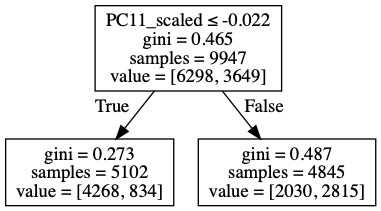

In [22]:
#Print tree
col_names = list(clean_train_o_pca.drop(columns=['label']).columns)
dot_data = StringIO()
export_graphviz(o_tree_pca, out_file=dot_data, feature_names=col_names, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stump_1_pca.png')
Image('stump_1_pca.png')

## Run models for predicting high blood pressure

In [23]:
#Blood pressure - cluster, RF
sk_models.run_rf_model(clean_train_b, clean_test_b, ['label'], list(clean_train_b.drop(['label'],axis=1).columns),
          .8)

(array([0.29583333, 0.4       , 0.2       , ..., 0.        , 0.2       ,
        0.2       ]), array([0, 0, 0, ..., 0, 0, 0]), 0.6664656212303981)

In [24]:
#Blood pressure - cluster, SVC
sk_models.run_SVC_model(clean_train_b, clean_test_b, ['label'], list(clean_train_b.drop(['label'],axis=1).columns),
          .8)

(array([0.37357718, 0.61454085, 0.23547729, ..., 0.1566988 , 0.19039903,
        0.36503672]), array([0, 0, 0, ..., 0, 0, 0]), 0.6616405307599518)

In [25]:
#Blood pressure - cluster, stump decision tree
tree, accuracy_t = sk_models.run_DT_model(clean_train_b, clean_test_b, ['label'], list(clean_train_b.drop(['label'],axis=1).columns),
          .8)

accuracy_t

0.6468636911942099

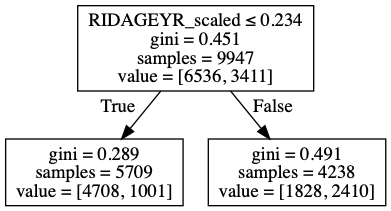

In [26]:
#Print tree
col_names = list(clean_train_b.drop(columns=['label']).columns)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=col_names, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stump_2.png')
Image('stump_2.png')

In [27]:
#Blood pressure - PCA, RF
sk_models.run_rf_model(clean_train_b_pca, clean_test_b_pca, ['label'], 
                       list(clean_train_b_pca.drop(['label'],axis=1).columns),.8)

(array([0.7, 0. , 0.3, ..., 0. , 0. , 1. ]),
 array([0, 0, 0, ..., 0, 0, 1]),
 0.8368516284680337)

In [28]:
#Blood pressure - PCA , SVC
sk_models.run_SVC_model(clean_train_b_pca, clean_test_b_pca, ['label'], 
                        list(clean_train_b_pca.drop(['label'],axis=1).columns),.8)

(array([9.89075794e-01, 7.27029259e-07, 4.90699589e-02, ...,
        1.00000010e-07, 1.21287426e-06, 1.00000000e+00]),
 array([1, 0, 0, ..., 0, 0, 1]),
 0.9933655006031363)

In [29]:
#Blood pressure - cluster, stump decision tree
tree_b_pca, accuracy_t_pca = sk_models.run_DT_model(clean_train_b_pca, clean_test_b_pca, ['label'], 
                                          list(clean_train_b_pca.drop(['label'],axis=1).columns),.8)

accuracy_t_pca

0.6468636911942099

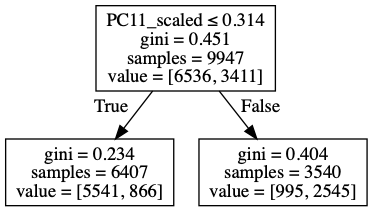

In [30]:
#Print tree
col_names = list(clean_train_b_pca.drop(columns=['label']).columns)
dot_data = StringIO()
export_graphviz(tree_b_pca, out_file=dot_data, feature_names=col_names, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stump_3.png')
Image('stump_3.png')